In [8]:
using JLD
using DataFrames
using Statistics
using Plots
pyplot();

Plots.PyPlotBackend()

In [45]:
# Signal lengths
NT = [50, 100, 200, 400, 800]
NE = length(NT)

# Number of repetitions
num_repeats = 100

results_dict = Dict()
results_array = zeros(NE,3)
for (i,n) in enumerate(NT)

    RMS = load("results/results_FEM_M5_deg1_S"*string(n)*".jld", "RMS")
    results_dict[n] = mean(RMS)
    
    results_array[i,1] = n
    results_array[i,2] = mean(RMS)
    results_array[i,3] = std(RMS) / num_repeats
end

df = DataFrame(results_dict)
sort!(df)

,50,100,200,400,800
,Float64,Float64,Float64,Float64,Float64
1,0.0210743,0.0106689,0.00942171,0.00844313,0.00798985


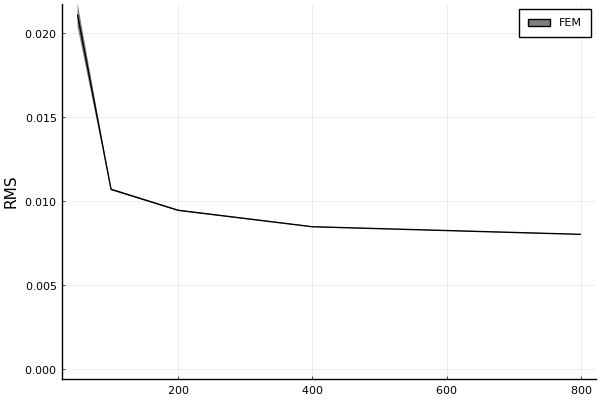

In [50]:
plot(results_array[:,1], 
     results_array[:,2], 
     ribbon=[results_array[:,3] results_array[:,3]], 
     color="black", 
     label="FEM", 
     ylabel="RMS", 
     ylims=[0, maximum(results_array[:,2])])